### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### Alfredo Coviello

GitHub link: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-acovi/blob/master/MovieLens%20Project%20Questions.ipynb



#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [26]:
data_pd = pd.read_csv("Data.csv")
item_pd = pd.read_csv("item.csv")
user_pd = pd.read_csv("user.csv")


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

data_pd.shape: (100000, 4)
data_pd.info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
user id      100000
movie id     100000
rating       100000
timestamp    100000
dtype: int64


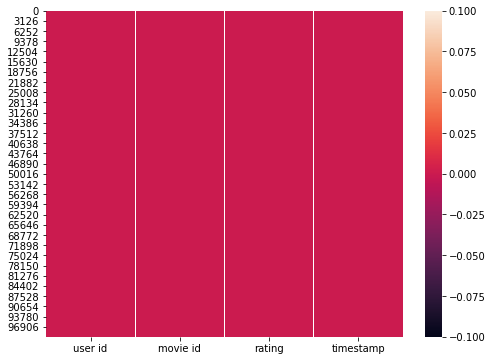

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [46]:
print("data_pd.shape: %s"% str(data_pd.shape))
print("data_pd.info: ")
data_pd.info()
print(data_pd.isna().count())
plt.figure(figsize=(8,6))
sns.heatmap(data_pd.isna())
plt.show()
data_pd.head()
# No missing values in data_pd 

item_pd.shape: (1681, 22)
item_pd.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi  

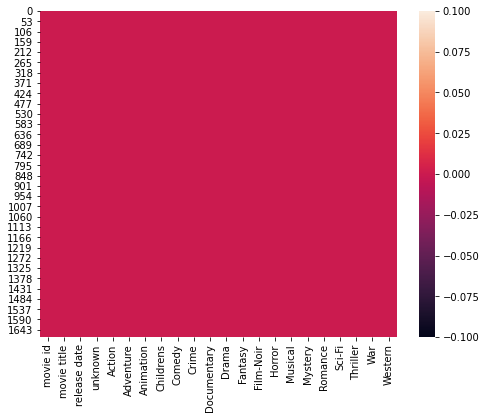

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [45]:
print("item_pd.shape: %s"% str(item_pd.shape))
print("item_pd.info:")
item_pd.info()
print(item_pd.isna().count())
plt.figure(figsize=(8,6))
sns.heatmap(item_pd.isna())
plt.show()
item_pd.head()

# No missing values in item_pd

user_pd.shape: (943, 5)
user_pd.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
user id       943
age           943
gender        943
occupation    943
zip code      943
dtype: int64


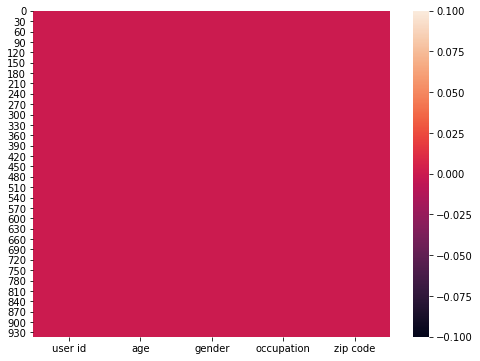

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [47]:
print("user_pd.shape: %s"% str(user_pd.shape))
print("user_pd.info:")
user_pd.info()
print(user_pd.isna().count())
plt.figure(figsize=(8,6))
sns.heatmap(user_pd.isna())
plt.show()
user_pd.head()

# No missing values in user_pd

#### 4. Find the number of movies per genre using the item data - 5 marks

#### use sum on the default axis


In [168]:
item_pd.drop(["movie id", "release date", "movie title"] , axis=1).sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [171]:
#hint: use sum on the axis = 1

#item_pd.drop("num_genres",axis=1,inplace=True)
item_pd["num_genres"] = item_pd.sum(axis=1) - item_pd["movie id"]  # add all numbers in row (i.e. genres=1) and subtract "movie id"
item_pd[item_pd["num_genres"] >1 ]

# Total of 849 movies with more than 1 genre


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,3
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [184]:
item_pd[item_pd["unknown"]==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [193]:
item_pd.drop(item_pd[item_pd["unknown"]==1].index, inplace=True)

In [920]:
item_pd.shape

(1680, 25)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

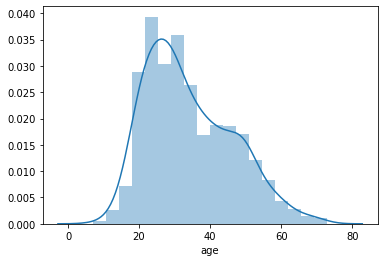

In [251]:
#your answers here
sns.distplot(user_pd["age"]);


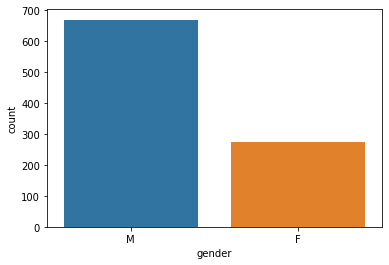

In [218]:
sns.countplot(user_pd["gender"]);

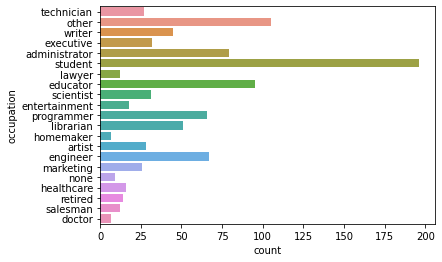

In [528]:
sns.countplot(y="occupation", data=user_pd  );

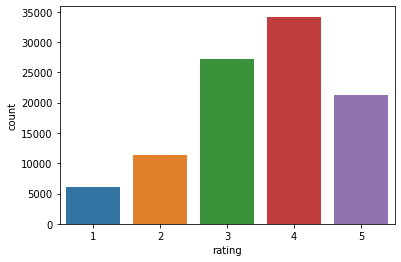

In [919]:
sns.countplot(x="rating", data=data_pd);

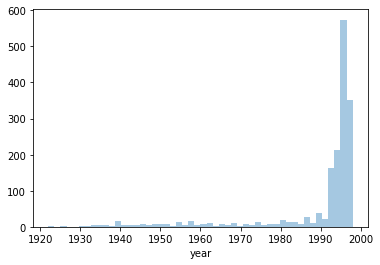

In [287]:
from datetime import datetime
item_pd["date"] = item_pd["release date"].apply(lambda x: datetime.strptime(x, '%d-%b-%Y'))
item_pd["year"] = item_pd["date"].apply(lambda x: x.year)
# datetime.strptime('4-Feb-1971', '%d-%b-%Y')
# item_pd.T #item_pd.info()

sns.distplot(item_pd["year"] , kde=False, );



### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

,year,Genre,count
0,1922,Action,0
1,1926,Action,0
2,1930,Action,0
3,1931,Action,0
4,1932,Action,0
...,...,...,...
1273,1994,Western,6
1274,1995,Western,2
1275,1996,Western,2
1276,1997,Western,0


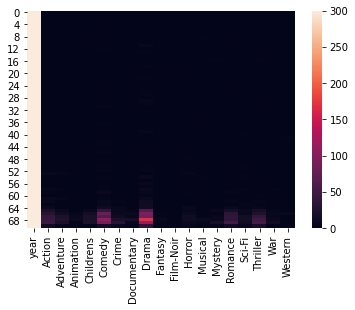

In [849]:
#Your answer here

releases_year =  item_pd.drop(['movie id','unknown', 'num_genres'], axis=1).groupby(by="year" ).sum().reset_index()
sns.heatmap(releases_year, vmax=300);

# Convert Genre columns to single column for easier calculations
releases_year =  releases_year.melt(id_vars=['year' ], var_name='Genre' , value_name='count' )

releases_year
# releases_year[releases_year.year==1995 ].sum() # 2376 - 1995 = 381

###Index(['year', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
   #    'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
   #    'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
   #    'Western', 'num_genres'],
   #   dtype='object')
###

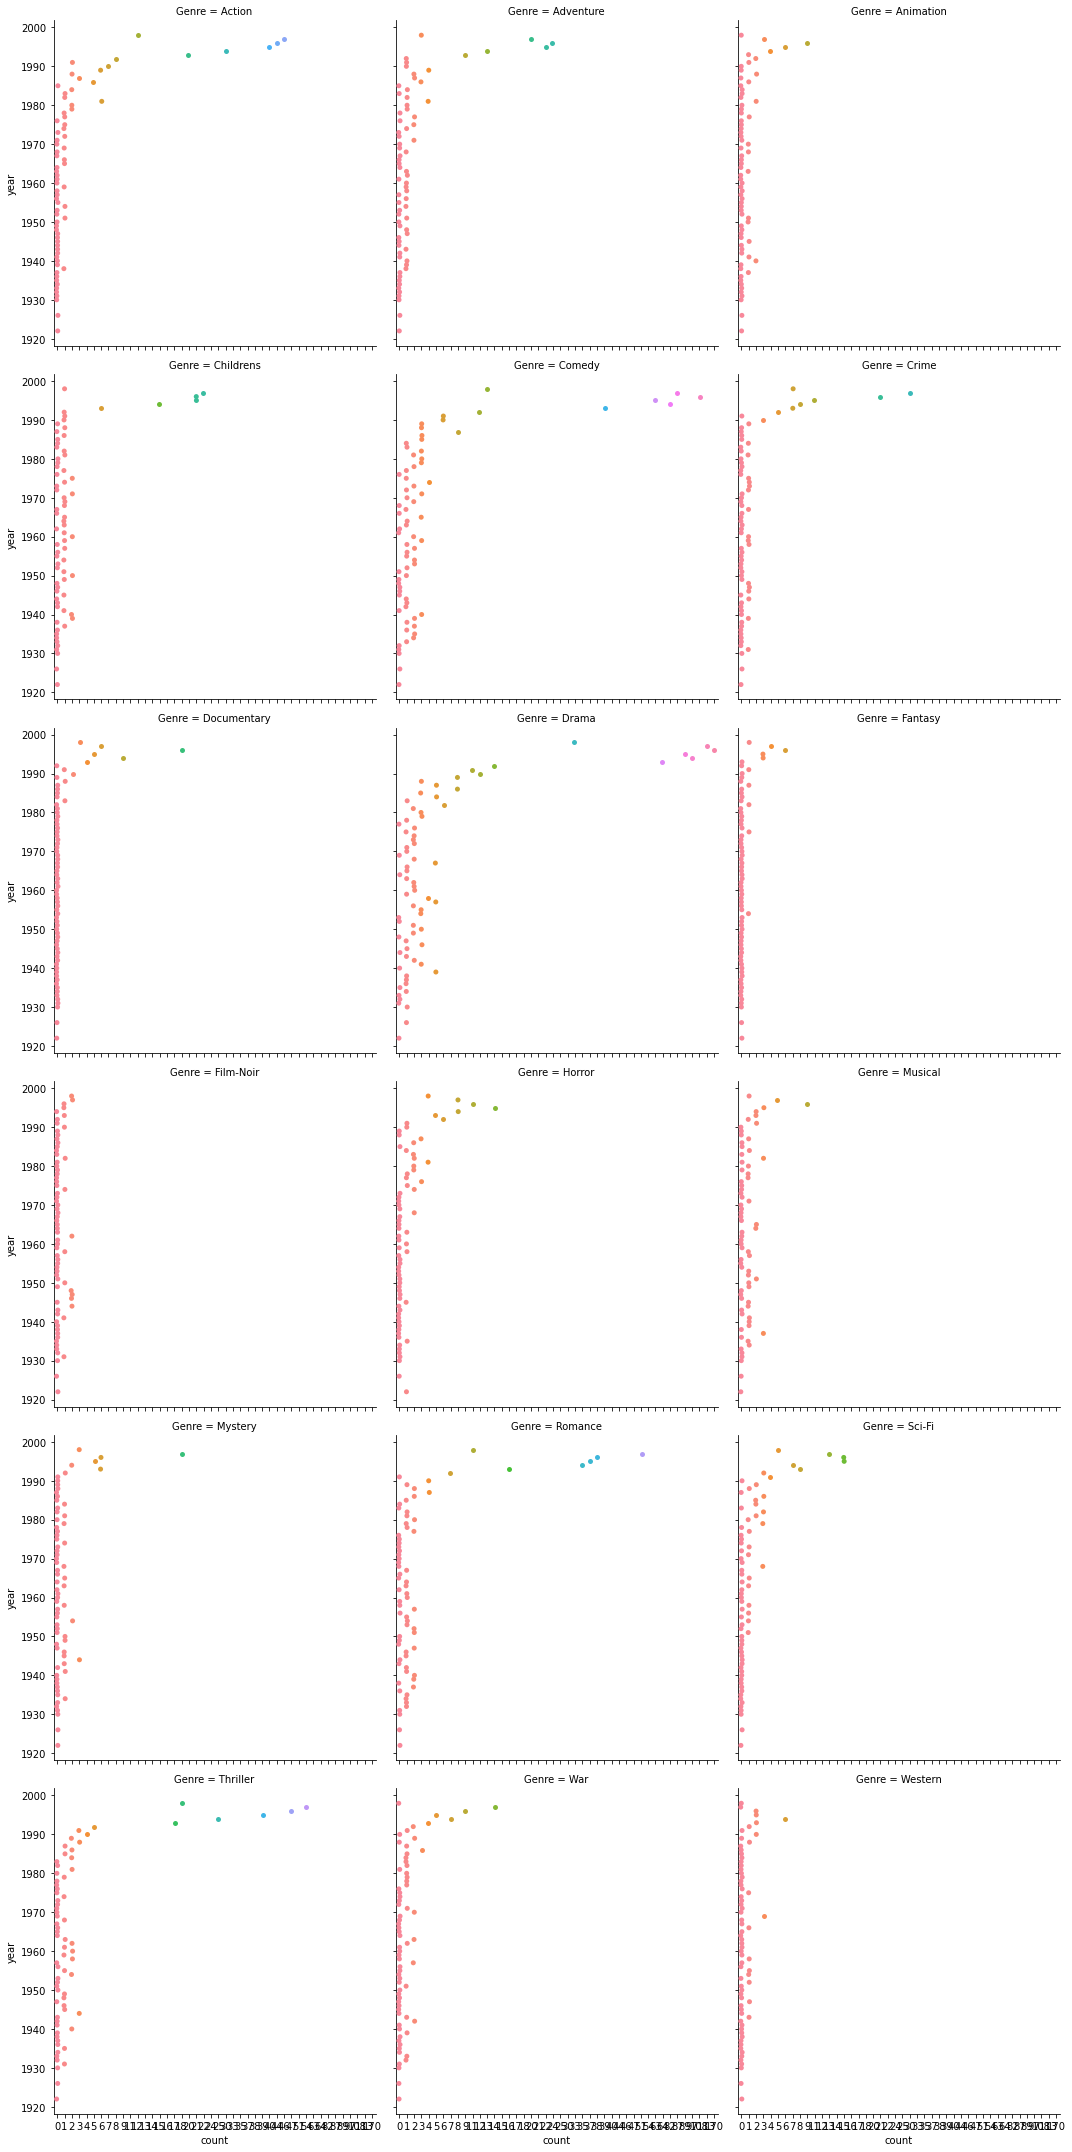

In [540]:
### Evolution of each Genre over the years

sns.catplot(col="Genre", data=releases_year, y='year', x='count', col_wrap=3, orient='v' );


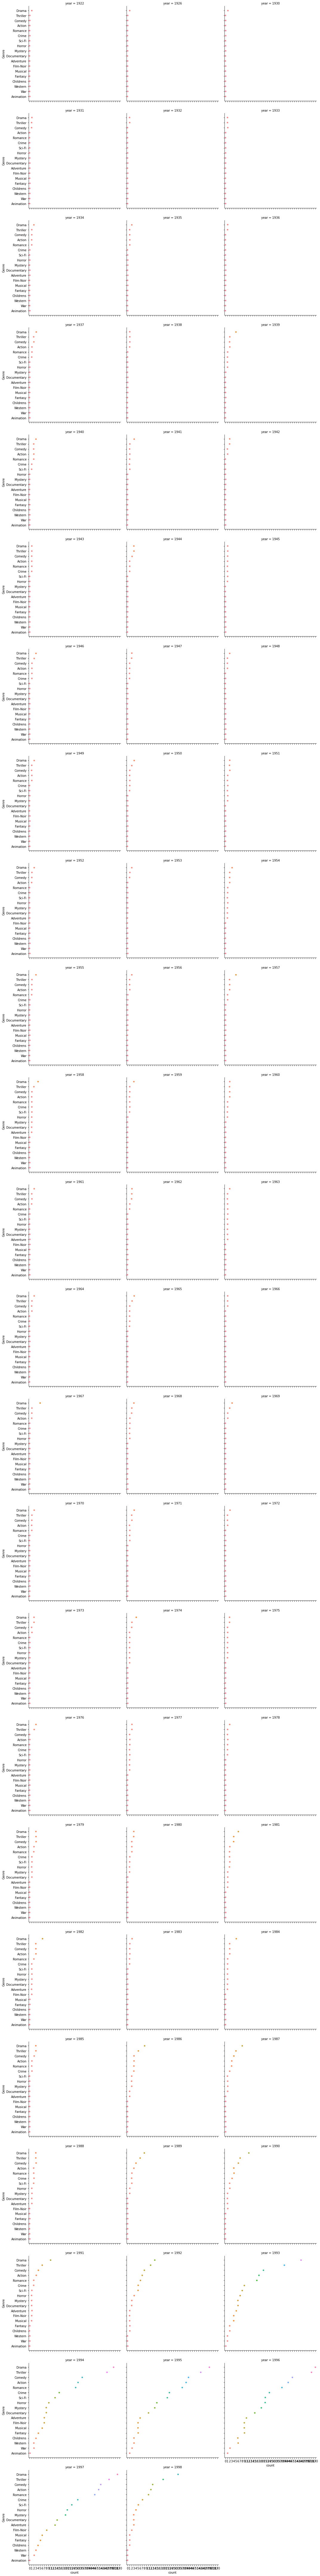

In [541]:
### Evolution of each year per Genre

sns.catplot(col="year", data=releases_year, y='Genre', x='count', col_wrap=3, orient='v' );
# releases_year["year"]>=1989],

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [707]:
#your answer here
#print(data_pd.shape)
movies_100 = data_pd.groupby(by='movie id').count()  #data_pd[data_pd['movie id'] == 6].shape # check 26
movies_100 = movies_100[movies_100['user id']>100].reindex()
#print(movies_100.shape)
movies_100.drop(['user id', 'rating', 'timestamp'], axis=1, inplace=True )
#print(movies_100)

# 1. Movies with more than 100 ratings
movies_100_titles = item_pd.merge(movies_100, how='inner', left_on='movie id', right_on='movie id')[['movie id', 'movie title']]
movies_100_titles


,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,4,Get Shorty
3,7,Twelve Monkeys
4,8,Babe
...,...,...
329,926,Down Periscope
330,928,"Craft, The"
331,1016,Con Air
332,1028,Grumpier Old Men


In [708]:
# 2. Average ratings of all movies
movies_ratings = data_pd.merge(item_pd, how='inner',left_on='movie id', right_on='movie id').groupby(by=['movie id', 'movie title']).mean()[['rating']]
movies_ratings.reset_index(inplace=True)
movies_ratings


,movie id,movie title,rating
0,1,Toy Story,3.878319
1,2,GoldenEye,3.206107
2,3,Four Rooms,3.033333
3,4,Get Shorty,3.550239
4,5,Copycat,3.302326
...,...,...,...
1675,1678,Mat' i syn,1.000000
1676,1679,B. Monkey,3.000000
1677,1680,Sliding Doors,2.000000
1678,1681,You So Crazy,3.000000


In [709]:
# 3. Movies titles and ratings that have >100 reviews
movies_ratings[movies_ratings['movie id'].isin(movies_100_titles['movie id'])]


,movie id,movie title,rating
0,1,Toy Story,3.878319
1,2,GoldenEye,3.206107
3,4,Get Shorty,3.550239
6,7,Twelve Monkeys,3.798469
7,8,Babe,3.995434
...,...,...,...
924,926,Down Periscope,2.702970
926,928,"Craft, The",3.115385
1014,1016,Con Air,3.459854
1026,1028,Grumpier Old Men,3.040541


In [710]:
# 4. Top 25 movies on average ratings for movies with more than 100 reviews

movies_ratings[movies_ratings['movie id'].isin(movies_100_titles['movie id'])].sort_values(by='rating', ascending=False).head(25)


,movie id,movie title,rating
406,408,"Close Shave, A",4.491071
316,318,Schindler's List,4.466443
168,169,"Wrong Trousers, The",4.466102
481,483,Casablanca,4.456790
63,64,"Shawshank Redemption, The",4.445230
601,603,Rear Window,4.387560
11,12,"Usual Suspects, The",4.385768
49,50,Star Wars,4.358491
177,178,12 Angry Men,4.344000
133,134,Citizen Kane,4.292929


In [711]:
# 4.1. Top 25 movies on average rating for movies with more than 100 reviews
# Alternate form using merge to filter movies >100 ratings instead of isin()

data_pd.merge(movies_100_titles, how='inner',left_on='movie id', right_on='movie id').groupby(by=['movie id','movie title']).mean().drop(['user id','timestamp'],axis=1).sort_values(by='rating', ascending=False).head(25)


,,rating
movie id,movie title,
408,"Close Shave, A",4.491071
318,Schindler's List,4.466443
169,"Wrong Trousers, The",4.466102
483,Casablanca,4.456790
64,"Shawshank Redemption, The",4.445230
603,Rear Window,4.387560
12,"Usual Suspects, The",4.385768
50,Star Wars,4.358491
178,12 Angry Men,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



   gender        Genre  value  percentages
0       F       Action   5442     0.211438
1       F    Adventure   3141     0.122037
2       F    Animation    995     0.038659
3       F    Childrens   2232     0.086720
4       F       Comedy   8068     0.313466
5       F        Crime   1794     0.069702
6       F  Documentary    187     0.007266
7       F        Drama  11008     0.427694
8       F      Fantasy    363     0.014104
9       F    Film-Noir    385     0.014958
10      F       Horror   1197     0.046507
11      F      Musical   1442     0.056026
12      F      Mystery   1314     0.051053
13      F      Romance   5858     0.227601
14      F       Sci-Fi   2629     0.102145
15      F     Thriller   5086     0.197607
16      F          War   2189     0.085049
17      F      Western    371     0.014414
18      M       Action  20147     0.271333
19      M    Adventure  10612     0.142919
20      M    Animation   2610     0.035151
21      M    Childrens   4950     0.066665
22      M  

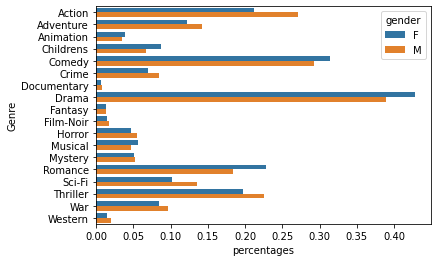

In [918]:
movies_users_ratings = data_pd.merge(user_pd, how='inner', left_on='user id', right_on='user id').merge(item_pd, how='inner', left_on='movie id', right_on='movie id')

# movies_users_ratings.groupby(by='gender').count()['user id']
    # Total number of user ratings F:25738  M:74252

# Convert genre columns to rows for easier calculations
melted = movies_users_ratings.melt(id_vars='gender', value_vars=['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], var_name='Genre'  )
counts = melted.groupby(by=['gender','Genre']).sum()
counts.reset_index( inplace=True)
#counts

counts['percentages'] = counts.apply(lambda x: x['value']/25738 if x['gender']=='F' else x['value']/74252, axis=1)

sns.barplot(data=counts,y='Genre', x='percentages', hue='gender')
print(counts)

In [ ]:
# Men watch more drama than women
    # Not true: 39% of M users against 43% of F users have rated Drama movies

# Women watch more Sci-Fi than men
    # Not true: 14% of M users against 10% of F users have rated Sci-Fi movies

# Men watch more Romance than women
    # Not true: 18% of M users against 23% of F users have rated Romance movies
